In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
import matplotlib as mpl
import pandas as pd

In [53]:
# nmemissions = pd.DataFrame({'Vehicle Type':nmtraffic.index, 'VMT':nmtraffic.values}).set_index('Vehicle Type')
# nmemissions['VMT'] = nmemissions['VMT'] * 365

In [56]:
# mapping_efs = {
#     'MC_Class 1': 'Motorcycles',
#     'PC_Class 2': 'Passenger cars',
#     'LT_Class 3': 'Light-duty trucks',
#     'Bus_Class 4': 'Buses',
#     'SU_Class 5': 'Single-unit',
#     'SU_Class 6': 'Single-unit',
#     'SU_Class 7': 'Single-unit',
#     'CT_Class 8': 'Combination-unit',
#     'CT_Class 9': 'Combination-unit',
#     'CT_Class 10': 'Combination-unit',
#     'CT_Class 11': 'Combination-unit',
#     'CT_Class 12': 'Combination-unit',
#     'CT_Class 13': 'Combination-unit'
#     }

In [25]:
#To estimate emissions for Colorado HPMS vehicle types, use emission factors data sent by Dale Wells @ CDPHE.

emissionfactors = pd.read_csv('Transportation/GREET_2019/EPAMOVES2014a_StateEmissionFactors.csv')

In [26]:
#If time, use state-specific age distributions (have for CO and NM, waiting on NV).

agedist = pd.read_csv('Transportation/GREET_2019/EPAMOVES2014_DefaultAgeDist_AnalysisYear2019.csv')
agedist['model_year'] = agedist['yearID']-agedist['ageID']
agedist.drop(columns=['yearID', 'ageID'], inplace=True)
agedist.set_index(['sourceTypeID', 'model_year'], inplace=True)

In [27]:
co_emissionfactors = emissionfactors[emissionfactors['State']== 'COLORADO']
co_emissionfactors.insert(2, 'weighted_emissions (g/mi)', 0)

In [28]:
for ind in co_emissionfactors.index:
    grams_per_mile_years = co_emissionfactors.loc[ind][4:]
    vehicle_type = co_emissionfactors.loc[ind]['Vehicle type']
    for sourceType in agedist.index.levels[0]:
        if str.lower(sourceType) in str.lower(vehicle_type):
            weighted_avg = np.dot(grams_per_mile_years[::-1], agedist.loc[sourceType])[0]
            co_emissionfactors.loc[ind, 'weighted_emissions (g/mi)'] = weighted_avg
co_emissionfactors.drop(co_emissionfactors.iloc[:, 4:], inplace = True, axis=1)
co_emissionfactors.rename(columns={'Pollutant (g/mi)': 'Pollutant'},inplace=True)

/Users/AnnieDillon/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/AnnieDillon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/AnnieDillon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [30]:
pollutants = co_emissionfactors['Pollutant'].unique()

In [31]:
co_emissionfactors['Fuel Type'] = co_emissionfactors['Vehicle type'].str.split().str[-1]

/Users/AnnieDillon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State,Vehicle type,weighted_emissions (g/mi),Pollutant,Fuel Type
5,COLORADO,"Combination long-haul truck, diesel",3.404296,CO,diesel
56,COLORADO,"Combination short-haul truck, diesel",3.493977,CO,diesel
107,COLORADO,"Light commercial truck, diesel",2.969602,CO,diesel
158,COLORADO,"Light commercial truck, gasoline",5.711166,CO,gasoline
209,COLORADO,"Passenger car, diesel",3.810544,CO,diesel
...,...,...,...,...,...
6686,COLORADO,"Single unit long-haul truck, gasoline",0.609646,VOC (Evap),gasoline
6737,COLORADO,"Single unit short-haul truck, diesel",0.023129,VOC (Evap),diesel
6788,COLORADO,"Single unit short-haul truck, gasoline",0.930539,VOC (Evap),gasoline
6839,COLORADO,"Transit bus, CNG",NaN,VOC (Evap),CNG


In [33]:
co_emissionfactors['Vehicle type'].unique()

array(['Combination long-haul truck, diesel',
       'Combination short-haul truck, diesel',
       'Light commercial truck, diesel',
       'Light commercial truck, gasoline', 'Passenger car, diesel',
       'Passenger car, gasoline', 'Passenger truck, diesel',
       'Passenger truck, gasoline', 'Refuse truck, diesel',
       'School bus, diesel', 'School bus, gasoline',
       'Single unit long-haul truck, diesel',
       'Single unit long-haul truck, gasoline',
       'Single unit short-haul truck, diesel',
       'Single unit short-haul truck, gasoline', 'Transit bus, CNG',
       'Transit bus, diesel'], dtype=object)

In [ ]:
co_emissions

In [522]:
# for fuel in co_emissionfactors['Fuel Type'].unique():
#     for pollutant in emissionfactors['Pollutant'].unique():
#         nmemissions[fuel+'_'+pollutant] = np.zeros(nmemissions.shape[0])

KeyError: 'Fuel Type'

In [525]:
# for ind in nmemissions.index:
#     vehicle_type = mapping[ind]
#     for fuel in np.unique(emissionfactors['Fuel Type']):
#         for pollutant in np.unique(emissionfactors['pollutant']):
#             row = np.logical_and(np.logical_and(emissionfactors['Fuel Type'] == fuel, 
#                emissionfactors['pollutant'] == pollutant),
#                emissionfactors['Vehicle Type'] == vehicle_type
#               )
#             if np.sum(row) == 0:
#                 nmemissions.loc[ind][fuel+'_'+pollutant] = np.nan
#             else:
#                 assert(np.sum(row) == 1)
#                 nmemissions.loc[ind][fuel+'_'+pollutant] = emissionfactors.loc[row]['emissions (grams/mile)']
            

NameError: name 'mapping' is not defined

In [527]:
for i in pollutants:
    nmemissions[str(i)] = np.zeros(nmemissions.shape[0])

In [528]:
diesel_cols = list(nmemissions.columns[nmemissions.columns.str.contains('diesel')])
diesel_cols

[]

In [529]:
gasoline_cols = list(nmemissions.columns[nmemissions.columns.str.contains('gasoline')])
gasoline_cols

[]

In [530]:
# for ind in nmemissions.index:
#     vehicle_type = mapping[ind]
#     for i in pollutants:
#         diesel_ef = [k for k in diesel_cols if str(i) in k]
#         gas_ef = [k for k in gasoline_cols if str(i) in k]
#         if vehicle_type == 'Heavy-duty vehicles':
#             nmemissions.loc[ind][str(i)] = ((nmemissions.loc[ind]['VMT'] * .894*1.013 * nmemissions.loc[ind][diesel_ef].sum()) + (nmemissions.loc[ind]['VMT'] * .106 * nmemissions.loc[ind][gas_ef].sum()))/1000000
#         elif vehicle_type == 'Light-duty trucks':
#             nmemissions.loc[ind][str(i)] = ((nmemissions.loc[ind]['VMT'] * .045*1.013 * nmemissions.loc[ind][diesel_ef].sum()) + (nmemissions.loc[ind]['VMT'] * .955 * nmemissions.loc[ind][gas_ef].sum()))/1000000
#         elif vehicle_type == 'Light-duty vehicles':
#             nmemissions.loc[ind][str(i)] = ((nmemissions.loc[ind]['VMT'] * .06*1.013 * nmemissions.loc[ind][diesel_ef].sum()) + (nmemissions.loc[ind]['VMT'] * .94 * nmemissions.loc[ind][gas_ef].sum()))/1000000
#         elif vehicle_type == 'Motorcycles':
#             nmemissions.loc[ind][str(i)] = (nmemissions.loc[ind]['VMT'] * nmemissions.loc[ind][gas_ef].sum())/1000000

NameError: name 'mapping' is not defined

In [531]:
#nmemissions = nmemissions.reset_index()

In [533]:
# for i in cols:
#     nmemissions[str(i) + '_grams'] = nmemissions[str(i)] * nmemissions['VMT']

In [534]:
pollutants_nmemissions = nmemissions[pollutants]
nmemissions_normalized = pollutants_nmemissions / pollutants_nmemissions.sum()

In [535]:
agg_nmemissions = pd.DataFrame()
agg_nmemissions['Motorcycles'] = pollutants_nmemissions.loc[0]
agg_nmemissions['Passenger cars'] = pollutants_nmemissions.loc[1]
agg_nmemissions['Light-duty trucks'] = pollutants_nmemissions.loc[2]
agg_nmemissions['Heavy-duty trucks\n (Single unit)'] = pollutants_nmemissions.loc[3:6].sum()
agg_nmemissions['Heavy-duty trucks\n (Combination unit)'] = pollutants_nmemissions.loc[7:].sum()

In [536]:
nmemissions_normalized

,CO,NOx,PM10,PM10 (TBW),PM2.5,PM2.5 (TBW),VOC,VOC (Evap)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [537]:
nmemissions_normalized

,CO,NOx,PM10,PM10 (TBW),PM2.5,PM2.5 (TBW),VOC,VOC (Evap)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [538]:
nmemissions_normalized = agg_nmemissions.T / agg_nmemissions.sum(axis=1)

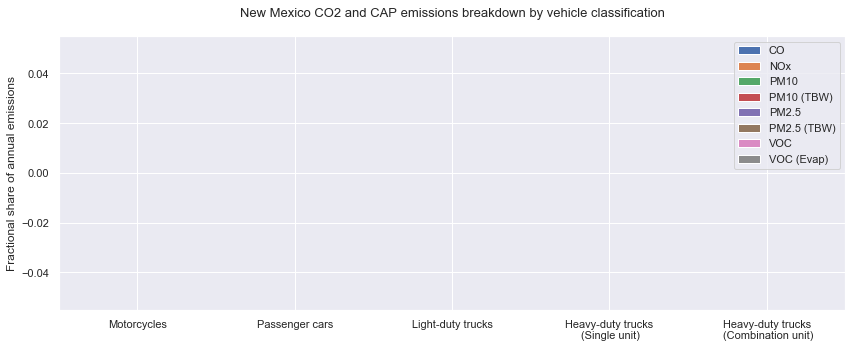

In [539]:
import seaborn as sns

sns.set()
fig, ax = plt.subplots(1,1,figsize=(12,5))
(nmemissions_normalized).plot.bar(ax=ax)
ax.set_xticklabels(nmemissions_normalized.index, rotation=0)
ax.set_ylabel('Fractional share of annual emissions')
ax.set_title('New Mexico CO2 and CAP emissions breakdown by vehicle classification', fontsize = 13, pad= 20)
plt.tight_layout()
fig.savefig(('figures/nm_TransporationEmissions_byVehicleClassification_percent.png'), bbox_inches='tight', transparent=False,dpi=80)


In [540]:
colors = sns.color_palette(n_colors=len(pollutants))

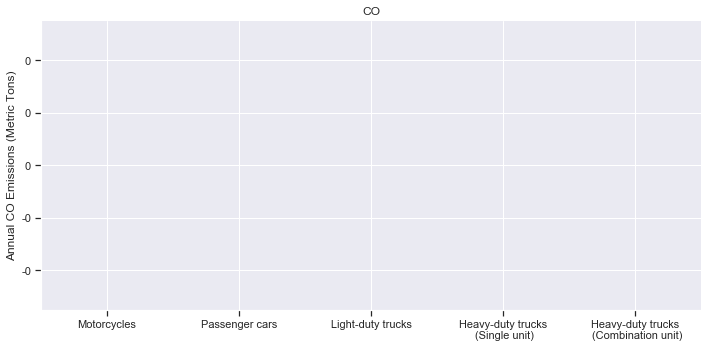

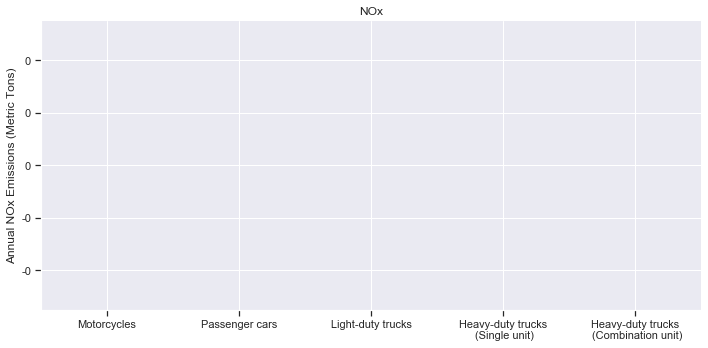

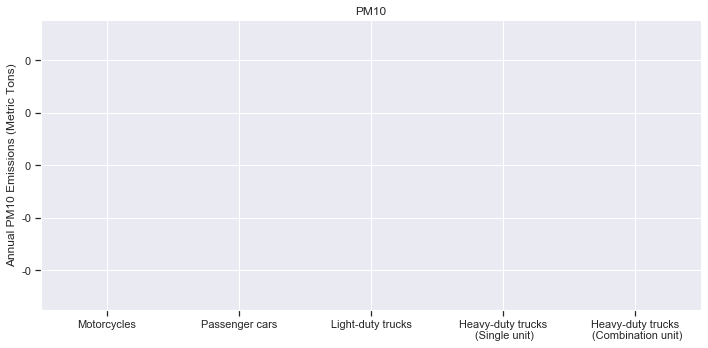

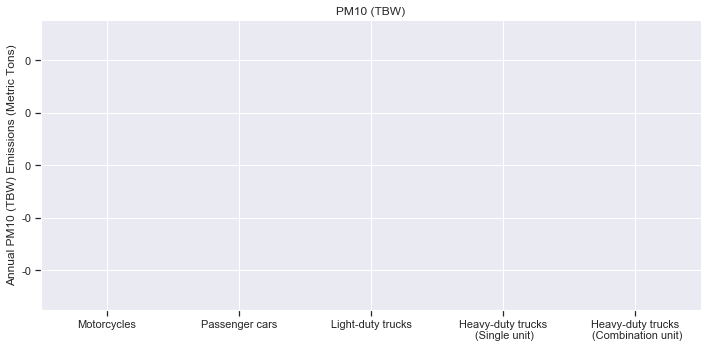

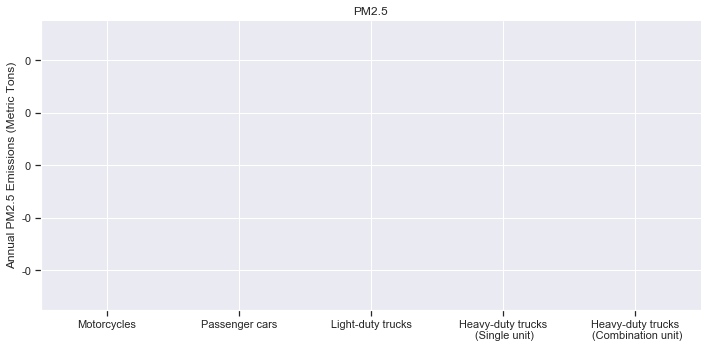

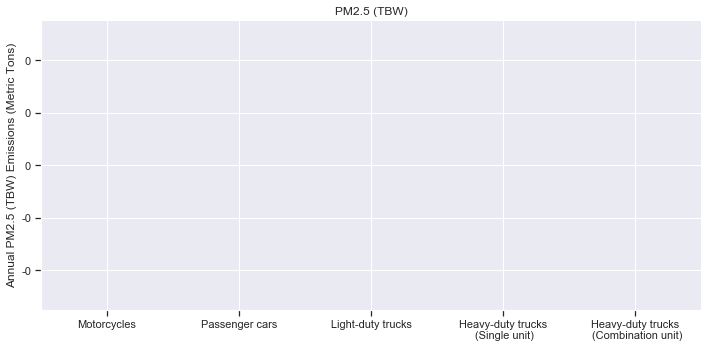

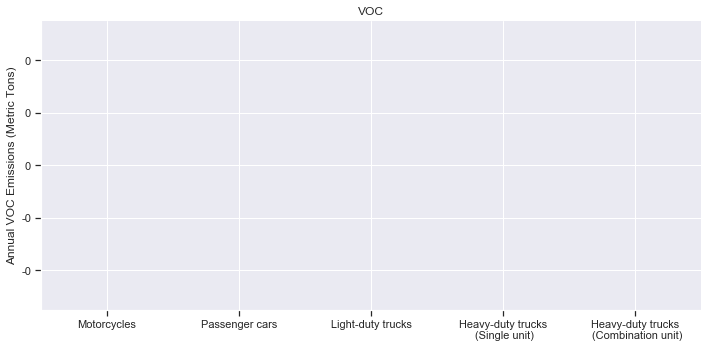

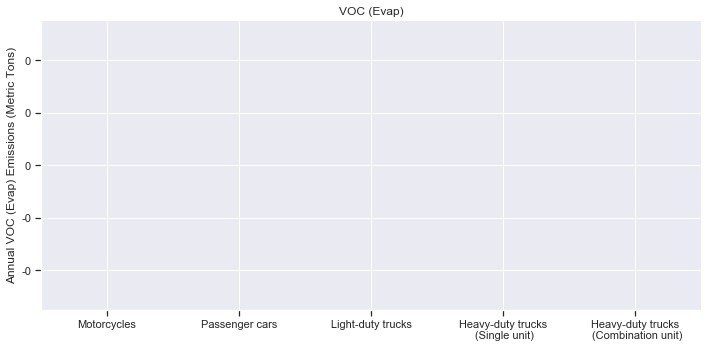

In [541]:
for i,pol in enumerate(pollutants):
    fig, ax = plt.subplots(1,1)
    agg_nmemissions.T.plot(kind='bar', y=str(pol), figsize=(10,5), ax=ax, legend=False, color=colors[i], rot=0)
    ax.ticklabel_format(style='plain', axis='y')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xlabel('')
    ax.set_ylabel('Annual {} Emissions (Metric Tons)'.format(str(pol)))
    ax.set_title(str(pol))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.tight_layout()
    fig.savefig(('figures/nm_transporationEmissions_byVehicleClassification_mass_{}.png'.format(pol)), bbox_inches='tight', transparent=False,dpi=80)

# fig.suptitle("New Mexico Annual CO2 and CAP emissions by vehicle classification", y=1.02)
# plt.subplots_adjust(bottom=0.3)


